In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/us-accidents'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


In [232]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [233]:
df1 = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv")
df1 .head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

In [61]:
df1.shape

(2845342, 47)

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [63]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [64]:
df1.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

****Is there any missing data , if yes visualize****

In [45]:
missing= df1.isna().sum()

print(missing)

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [66]:
# A special library in pandas to visualize missing values
import missingno as msno

<AxesSubplot: >

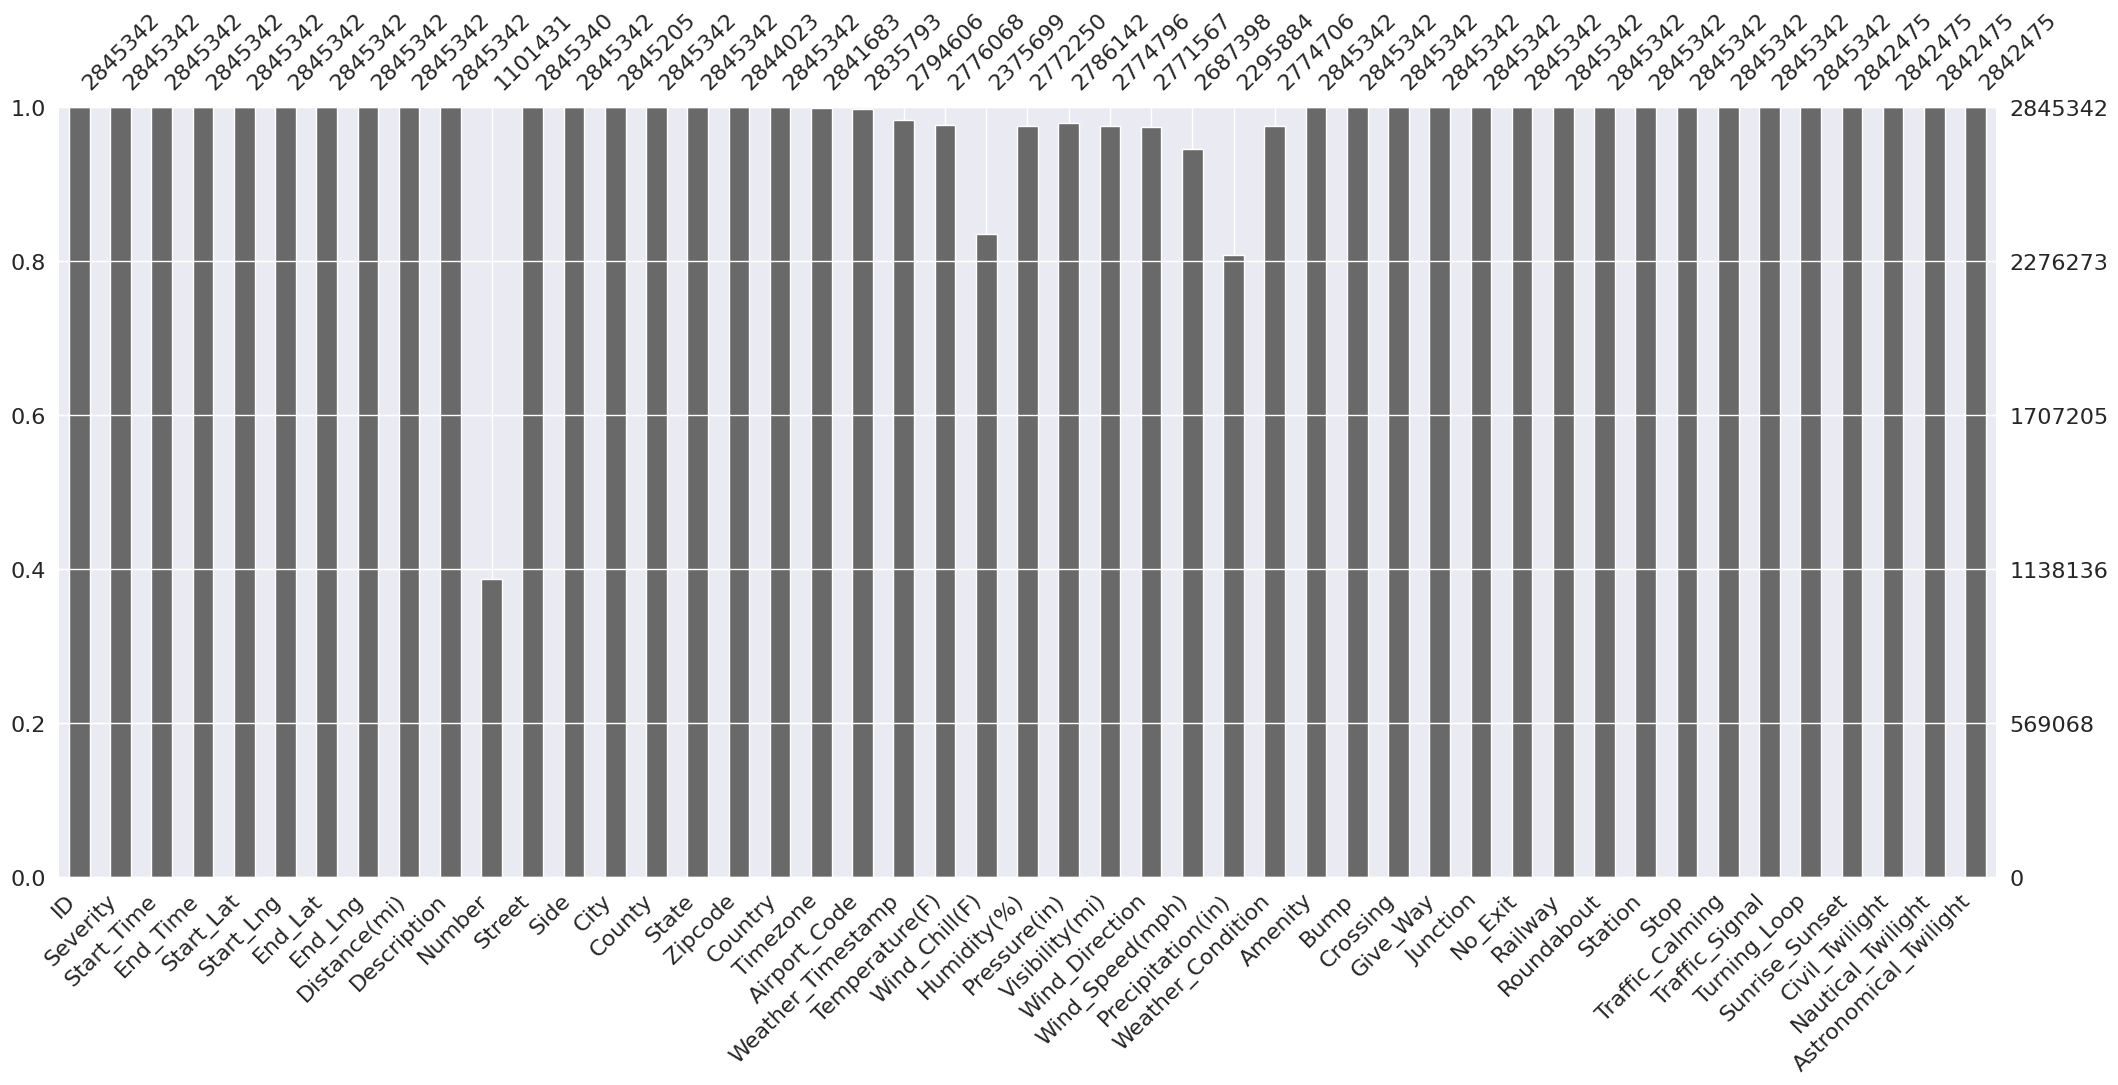

In [67]:
msno.bar(df1)

****Remove any columns that you may find not useful for your analysis.[[](http://)](http://)****

In [166]:
df= df1.drop(columns= [ 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'Airport_Code', 'Amenity',
        'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'])

In [231]:
df.head()

ID  Severity          Start_Time             End_Time        City  \
0  A-1         3 2016-02-08 00:37:08  2016-02-08 06:37:08      Dublin   
1  A-2         2 2016-02-08 05:56:20  2016-02-08 11:56:20      Dayton   
2  A-3         2 2016-02-08 06:15:39  2016-02-08 12:15:39  Cincinnati   
3  A-4         2 2016-02-08 06:51:45  2016-02-08 12:51:45       Akron   
4  A-5         3 2016-02-08 07:53:43  2016-02-08 13:53:43  Cincinnati   

       County State Zipcode Country    Timezone  ... Junction  No_Exit  \
0    Franklin    OH   43017      US  US/Eastern  ...    False    False   
1  Montgomery    OH   45424      US  US/Eastern  ...    False    False   
2    Hamilton    OH   45203      US  US/Eastern  ...     True    False   
3      Summit    OH   44311      US  US/Eastern  ...    False    False   
4    Hamilton    OH   45217      US  US/Eastern  ...    False    False   

   Railway  Roundabout  Station   Stop Traffic_Calming  Traffic_Signal  \
0    False       False    False  False           False           False   
1    False       False    False  False           False           False   
2    False       False    False  False           False           False   
3    False       False    False  False           False           False   
4    False       False    False  False           False           False   

   Turning_Loop Sunrise_Sunset  
0         False          Night  
1         False          Night  
2         False          Night  
3         False          Night  
4         False            Day  

[5 rows x 33 columns]

****Plot the top 10 cities with the most accidents.****

In [235]:
city = pd.DataFrame(df.City.value_counts().reset_index().rename(columns={'index':'City', 'City':'Cases'}))
top_city=city.head(10)
top_city

City   Cases
0        Miami  106966
1  Los Angeles   68956
2      Orlando   54691
3       Dallas   41979
4      Houston   39448
5    Charlotte   33152
6   Sacramento   32559
7    San Diego   26627
8      Raleigh   22840
9  Minneapolis   22768

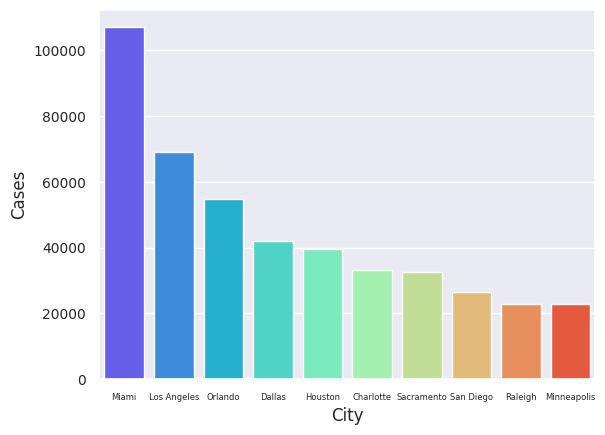

In [236]:
plt.xticks(fontsize=6)
plt.yticks(fontsize=10)
a = sns.barplot(x=top_city['City'],y= top_city.Cases,palette="rainbow")

****Plot the distribution of the start time.****

In [147]:
hour = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={"index":"Hour","Start_Time":"Accident_Cases"})
hour

Hour  Accident_Cases
0     17          220358
1     16          218385
2     15          214264
3     14          191480
4     18          168982
5     13          166473
6     12          143715
7      7          135191
8      8          130879
9     19          116911
10    11          113271
11     6          111160
12     9          108779
13    10          103926
14    20           94682
15    21           87078
16    22           81188
17     5           80303
18    23           74243
19     0           68800
20     1           59370
21     2           55443
22     4           51805
23     3           48656

<AxesSubplot: title={'center': '\n Accident cases for different hours of a day\n'}, xlabel='Hour', ylabel='Accident_Cases'>

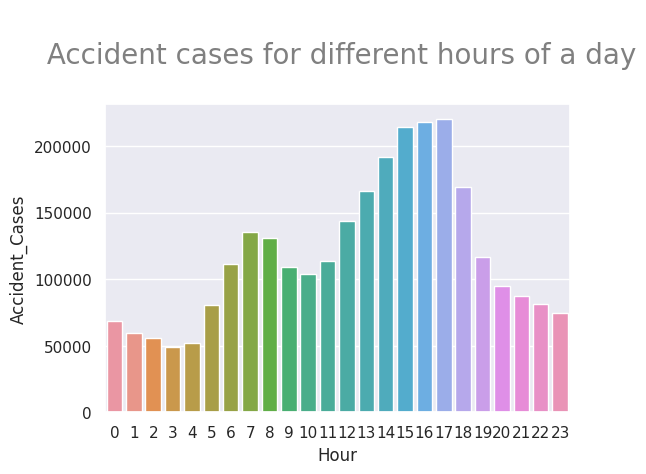

In [153]:
plt.figure(figsize=(6,4))
plt.title('\n Accident cases for different hours of a day\n', size=20, color='grey')
sns.barplot( x=hour.Hour, y= hour.Accident_Cases )

****Is the distribution of accidents by hour the same on weekends as on weekdays?****

In [157]:
Day = pd.DataFrame(df.Start_Time.dt.dayofweek.value_counts()).reset_index().rename(columns={"index":"Day","Start_Time":"Accident_Cases"})
Day

Day  Accident_Cases
0    4          492074
1    3          463477
2    2          455037
3    1          443968
4    0          419821
5    5          311691
6    6          259274

<AxesSubplot: title={'center': '\n Accident cases for different days of a week\n'}, xlabel='Day', ylabel='Accident_Cases'>

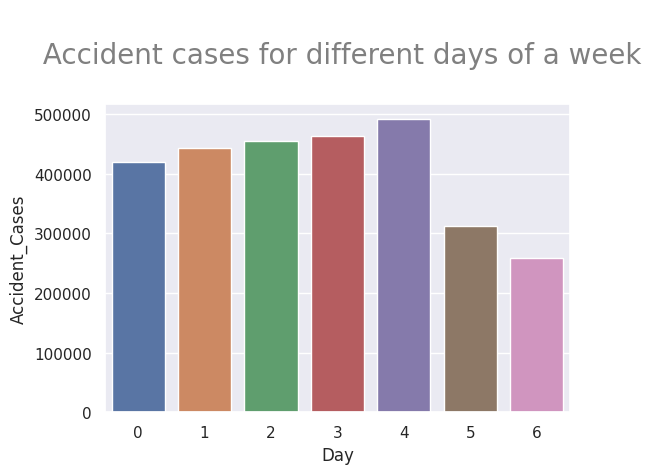

In [158]:
plt.figure(figsize=(6,4))
plt.title('\n Accident cases for different days of a week\n', size=20, color='grey')
sns.barplot( x=hour.Hour, y= Day.Accident_Cases )

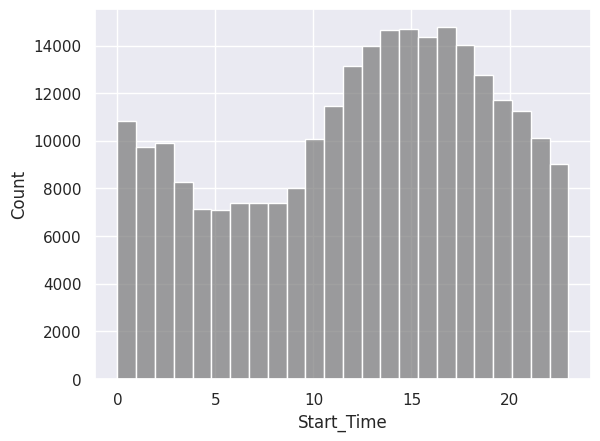

In [178]:
sunday = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.histplot(sunday.dt.hour,bins=24,color="grey")
plt.show()

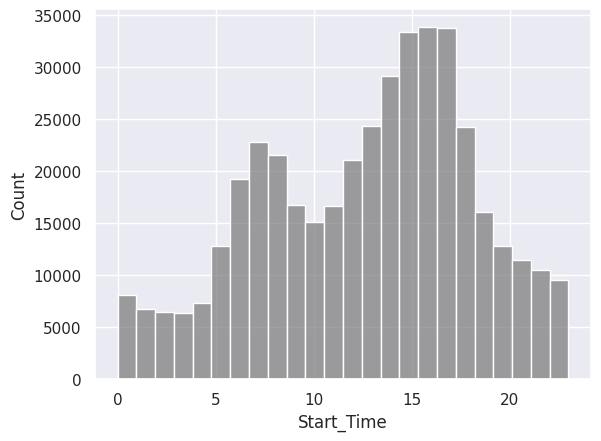

In [184]:
monday = df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.histplot(monday.dt.hour,bins=24,color="grey")
plt.show()

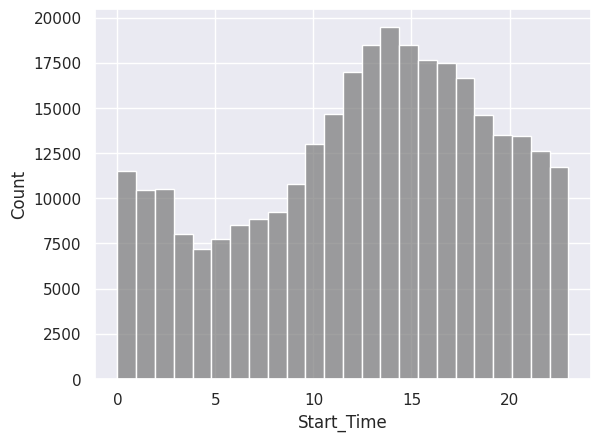

In [182]:
saturday = df.Start_Time[df.Start_Time.dt.dayofweek==5]
sns.histplot(saturday.dt.hour,bins=24,color="grey")
plt.show()

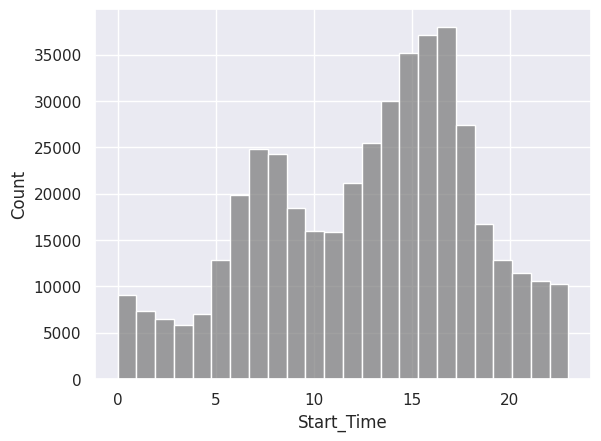

In [183]:
tuesday = df.Start_Time[df.Start_Time.dt.dayofweek==1]
sns.histplot(tuesday.dt.hour,bins=24,color="grey")
plt.show()

Yes, it seems that on weekends accidents more accidents are taking place in comparison to weekdays also distribution of time that they happened differs.

****What is the distribution of start time on Sundays?****

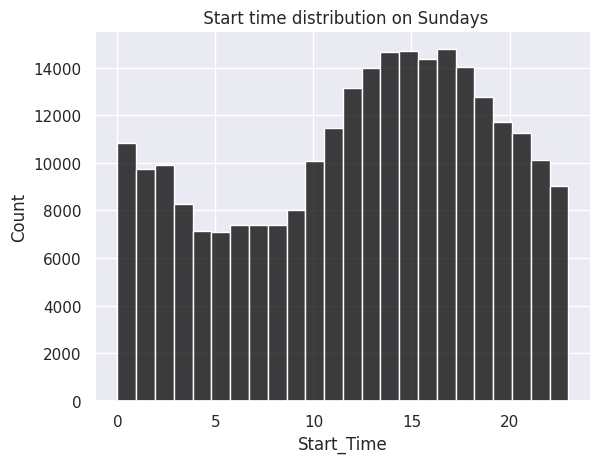

In [190]:
plt.title(" Start time distribution on Sundays")
sunday = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.histplot(sunday.dt.hour,bins=24,color="black")
plt.show()

****Create a geographical plot to show accidents across a map of the United States.****

In [261]:
import plotly as py

from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import plotly.graph_objs as go 
init_notebook_mode(connected=True)

In [284]:
c= pd.DataFrame(df.State.value_counts().reset_index().rename(columns={'index':'State', 'State':'Cases'}))
c

State   Cases
0     CA  795868
1     FL  401388
2     TX  149037
3     OR  126341
4     VA  113535
5     NY  108049
6     PA   99975
7     MN   97185
8     NC   91362
9     SC   89216
10    MD   65085
11    AZ   56504
12    NJ   52902
13    TN   52613
14    UT   49193
15    LA   47232
16    IL   47105
17    MI   43843
18    GA   40086
19    WA   32554
20    CT   29762
21    MO   29633
22    CO   25340
23    OH   24409
24    IN   20850
25    AL   19322
26    MT   15964
27    AR   10935
28    IA    9607
29    DC    9133
30    KS    9033
31    OK    8806
32    ID    8544
33    WI    7896
34    WV    7632
35    KY    6638
36    MA    6392
37    NV    6197
38    MS    5320
39    DE    4842
40    RI    4451
41    NH    3866
42    NE    3320
43    NM    2370
44    ND    2258
45    ME    2193
46    WY     990
47    VT     365
48    SD     201

In [296]:
data=dict(type="choropleth",
    locations=c['State'],
    locationmode= 'USA-states',
     colorscale='Earth',
          text=c['State'],
     z=c['Cases'],
     colorbar={"title":"State wise density"}
    )

In [298]:
layout= dict(geo={'scope':'usa'})

In [300]:
chmap=go.Figure(data=[data],layout= layout)

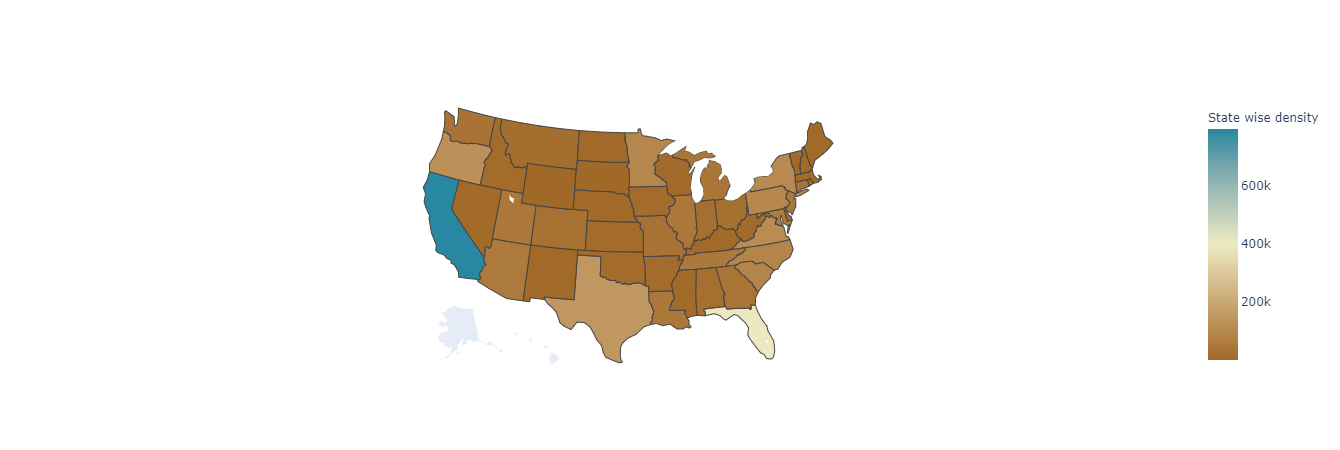

In [301]:
iplot(chmap)

****Among the top 100 cities in number of accidents, which states do they belong to most frequently?****

In [250]:
State= df['State']
city = pd.DataFrame(df.City.value_counts().reset_index().rename(columns={'index':'City', 'City':'Cases'}))
city['State']= State
top_c= city.head(100)

<AxesSubplot: xlabel='State', ylabel='Cases'>

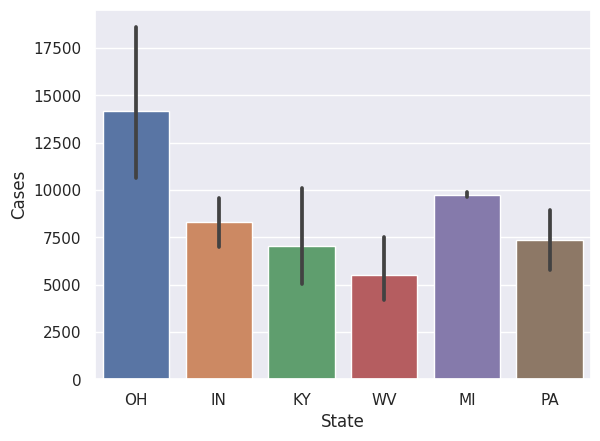

In [252]:
sns.barplot(x=top_c['State'],y=top_c['Cases'])

OH and MI belonged to most of top 100 most accidents cities.

****Which months have the most accidents?****

<AxesSubplot: xlabel='Month', ylabel='Accident_Cases'>

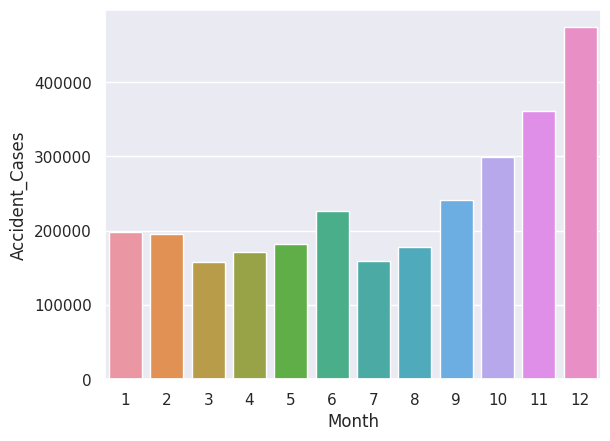

In [202]:
Month = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={"index":"Month","Start_Time":"Accident_Cases"})
plt.title('Accidents took place per month')
sns.barplot(x=Month.Month ,y=Month.Accident_Cases)

December had most number of accidents

****What is the trend of accidents year over year (decreasing/increasing?)****

<AxesSubplot: title={'center': 'Trend of accidents year over year'}, xlabel='year', ylabel='Accident_Cases'>

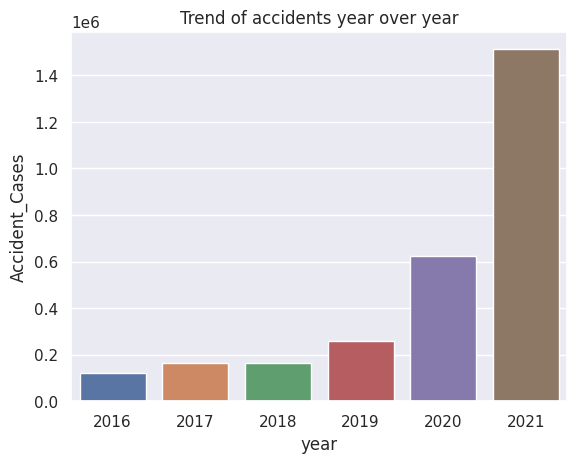

In [207]:
Year = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index":"year","Start_Time":"Accident_Cases"})
plt.title('Trend of accidents year over year')
sns.barplot(x=Year.year ,y=Year.Accident_Cases)

More accidents are taking place with every suceeding year

****Is the state of New York in the data?*****

In [253]:
(df['State']=='NY').value_counts()

False    2737293
True      108049
Name: State, dtype: int64

Yes, New York is available in data with 108049 accident cases

****Additional questions ****

**Cases on the scale of severity**

Text(0.5, 1.0, 'Cases on a scale of Severity')

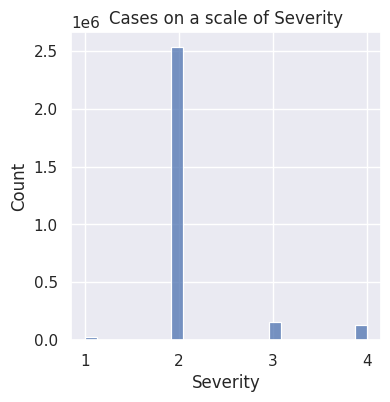

In [308]:
plt.figure(figsize=(4,4))
sns.histplot(data=df['Severity'])
plt.title("Cases on a scale of Severity")

**weather conditions affect on accidents?**

HUMIDITY

Text(0.5, 1.0, 'Cases according Humididity percentage')

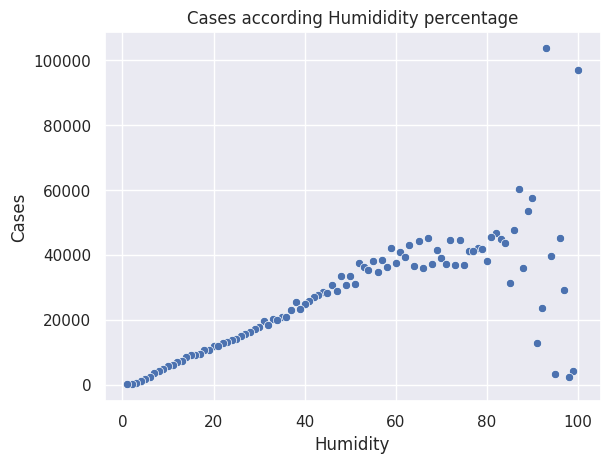

In [318]:
Humidity= pd.DataFrame(df['Humidity(%)'].value_counts().reset_index().rename(columns={'index':'Humidity', 'Humidity(%)':'Cases'}))
sns.scatterplot(x=Humidity.Humidity, y= Humidity.Cases)
plt.title("Cases according Humidity percentage")

PRESSURE

NameError: name 'ticker' is not defined

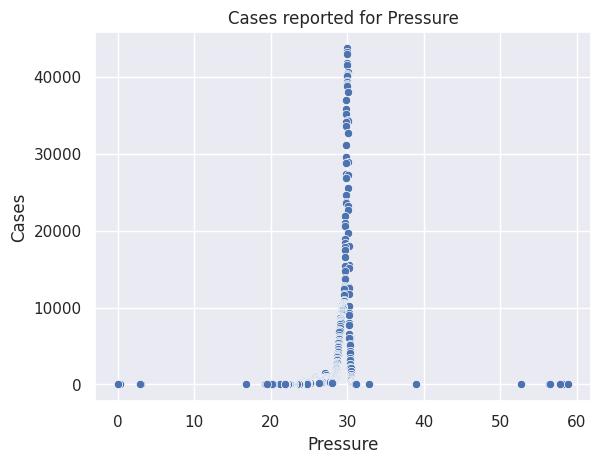

In [319]:
Pressure = pd.DataFrame(df['Pressure(in)'].value_counts().reset_index().rename(columns={'index':"Pressure", 'Pressure(in)':'Cases'}) )
sns.scatterplot(x=Pressure.Pressure, y= Pressure.Cases)
plt.title("Cases reported for Pressure")


VISIBILITY

<AxesSubplot: xlabel='Visibility', ylabel='Cases'>

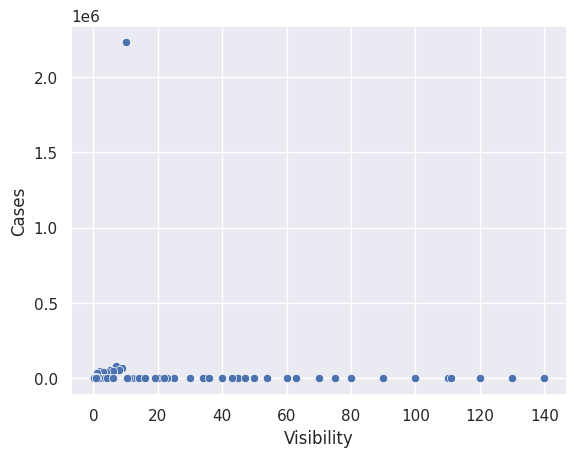

In [317]:
Visibility= pd.DataFrame(df['Visibility(mi)'].value_counts().reset_index().rename(columns={'index':'Visibility', 'Visibility(mi)':'Cases'}))
sns.scatterplot(x=Visibility.Visibility, y= Visibility.Cases)
plt.title("Cases reported for different Different Visibility")